# 다변량 선형 회귀 분석

* 특징이 많으면 데이터의 밀도가 낮고 과적합이 나올 수 있다.

* 상관관계가 높은 특징을 뽑아서 데이터의 밀도를 높인다.
    - 피어슨 상관계수 : 두 데이터의 공분산을 각각의 표준편차의 곱으로 나눈 값


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv('boston.csv')
boston[['LAT', 'MEDV', 'CMEDV']]

,LAT,MEDV,CMEDV
0,42.2550,24.0,24.0
1,42.2875,21.6,21.6
2,42.2830,34.7,34.7
3,42.2930,33.4,33.4
4,42.2980,36.2,36.2
...,...,...,...
501,42.2312,22.4,22.4
502,42.2275,20.6,20.6
503,42.2260,23.9,23.9
504,42.2240,22.0,22.0


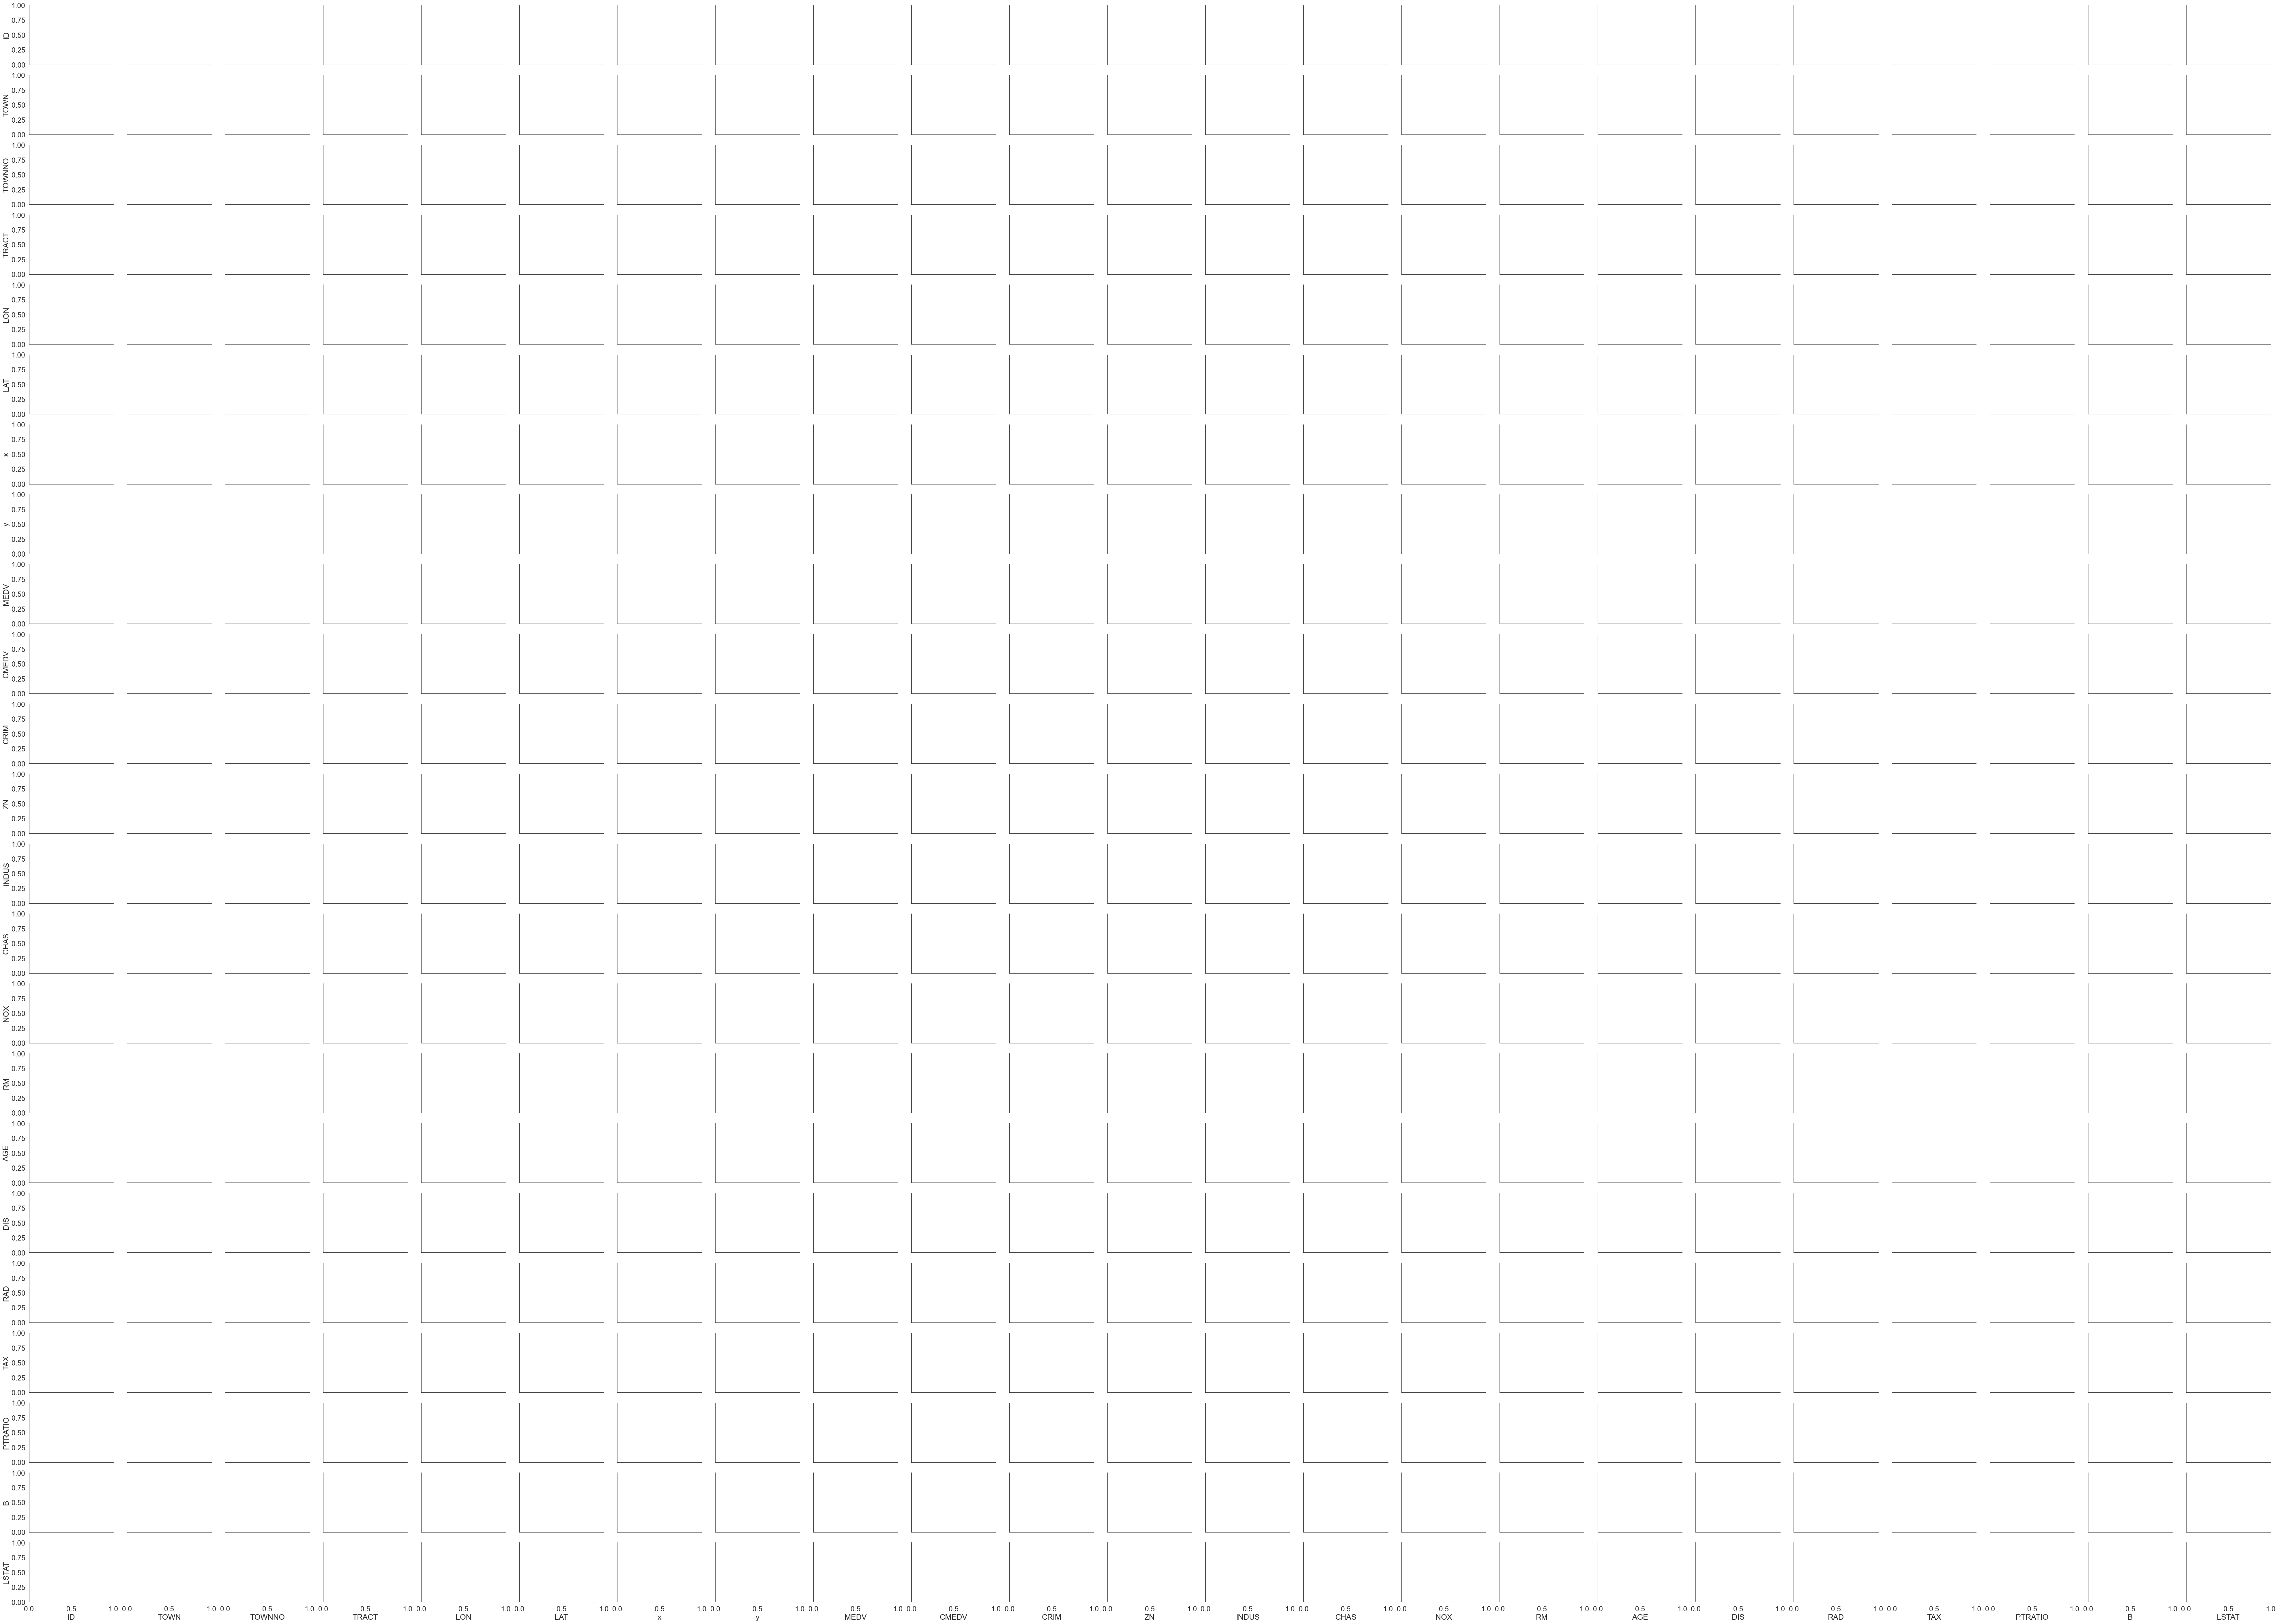

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')
g = sns.PairGrid(boston[4:], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

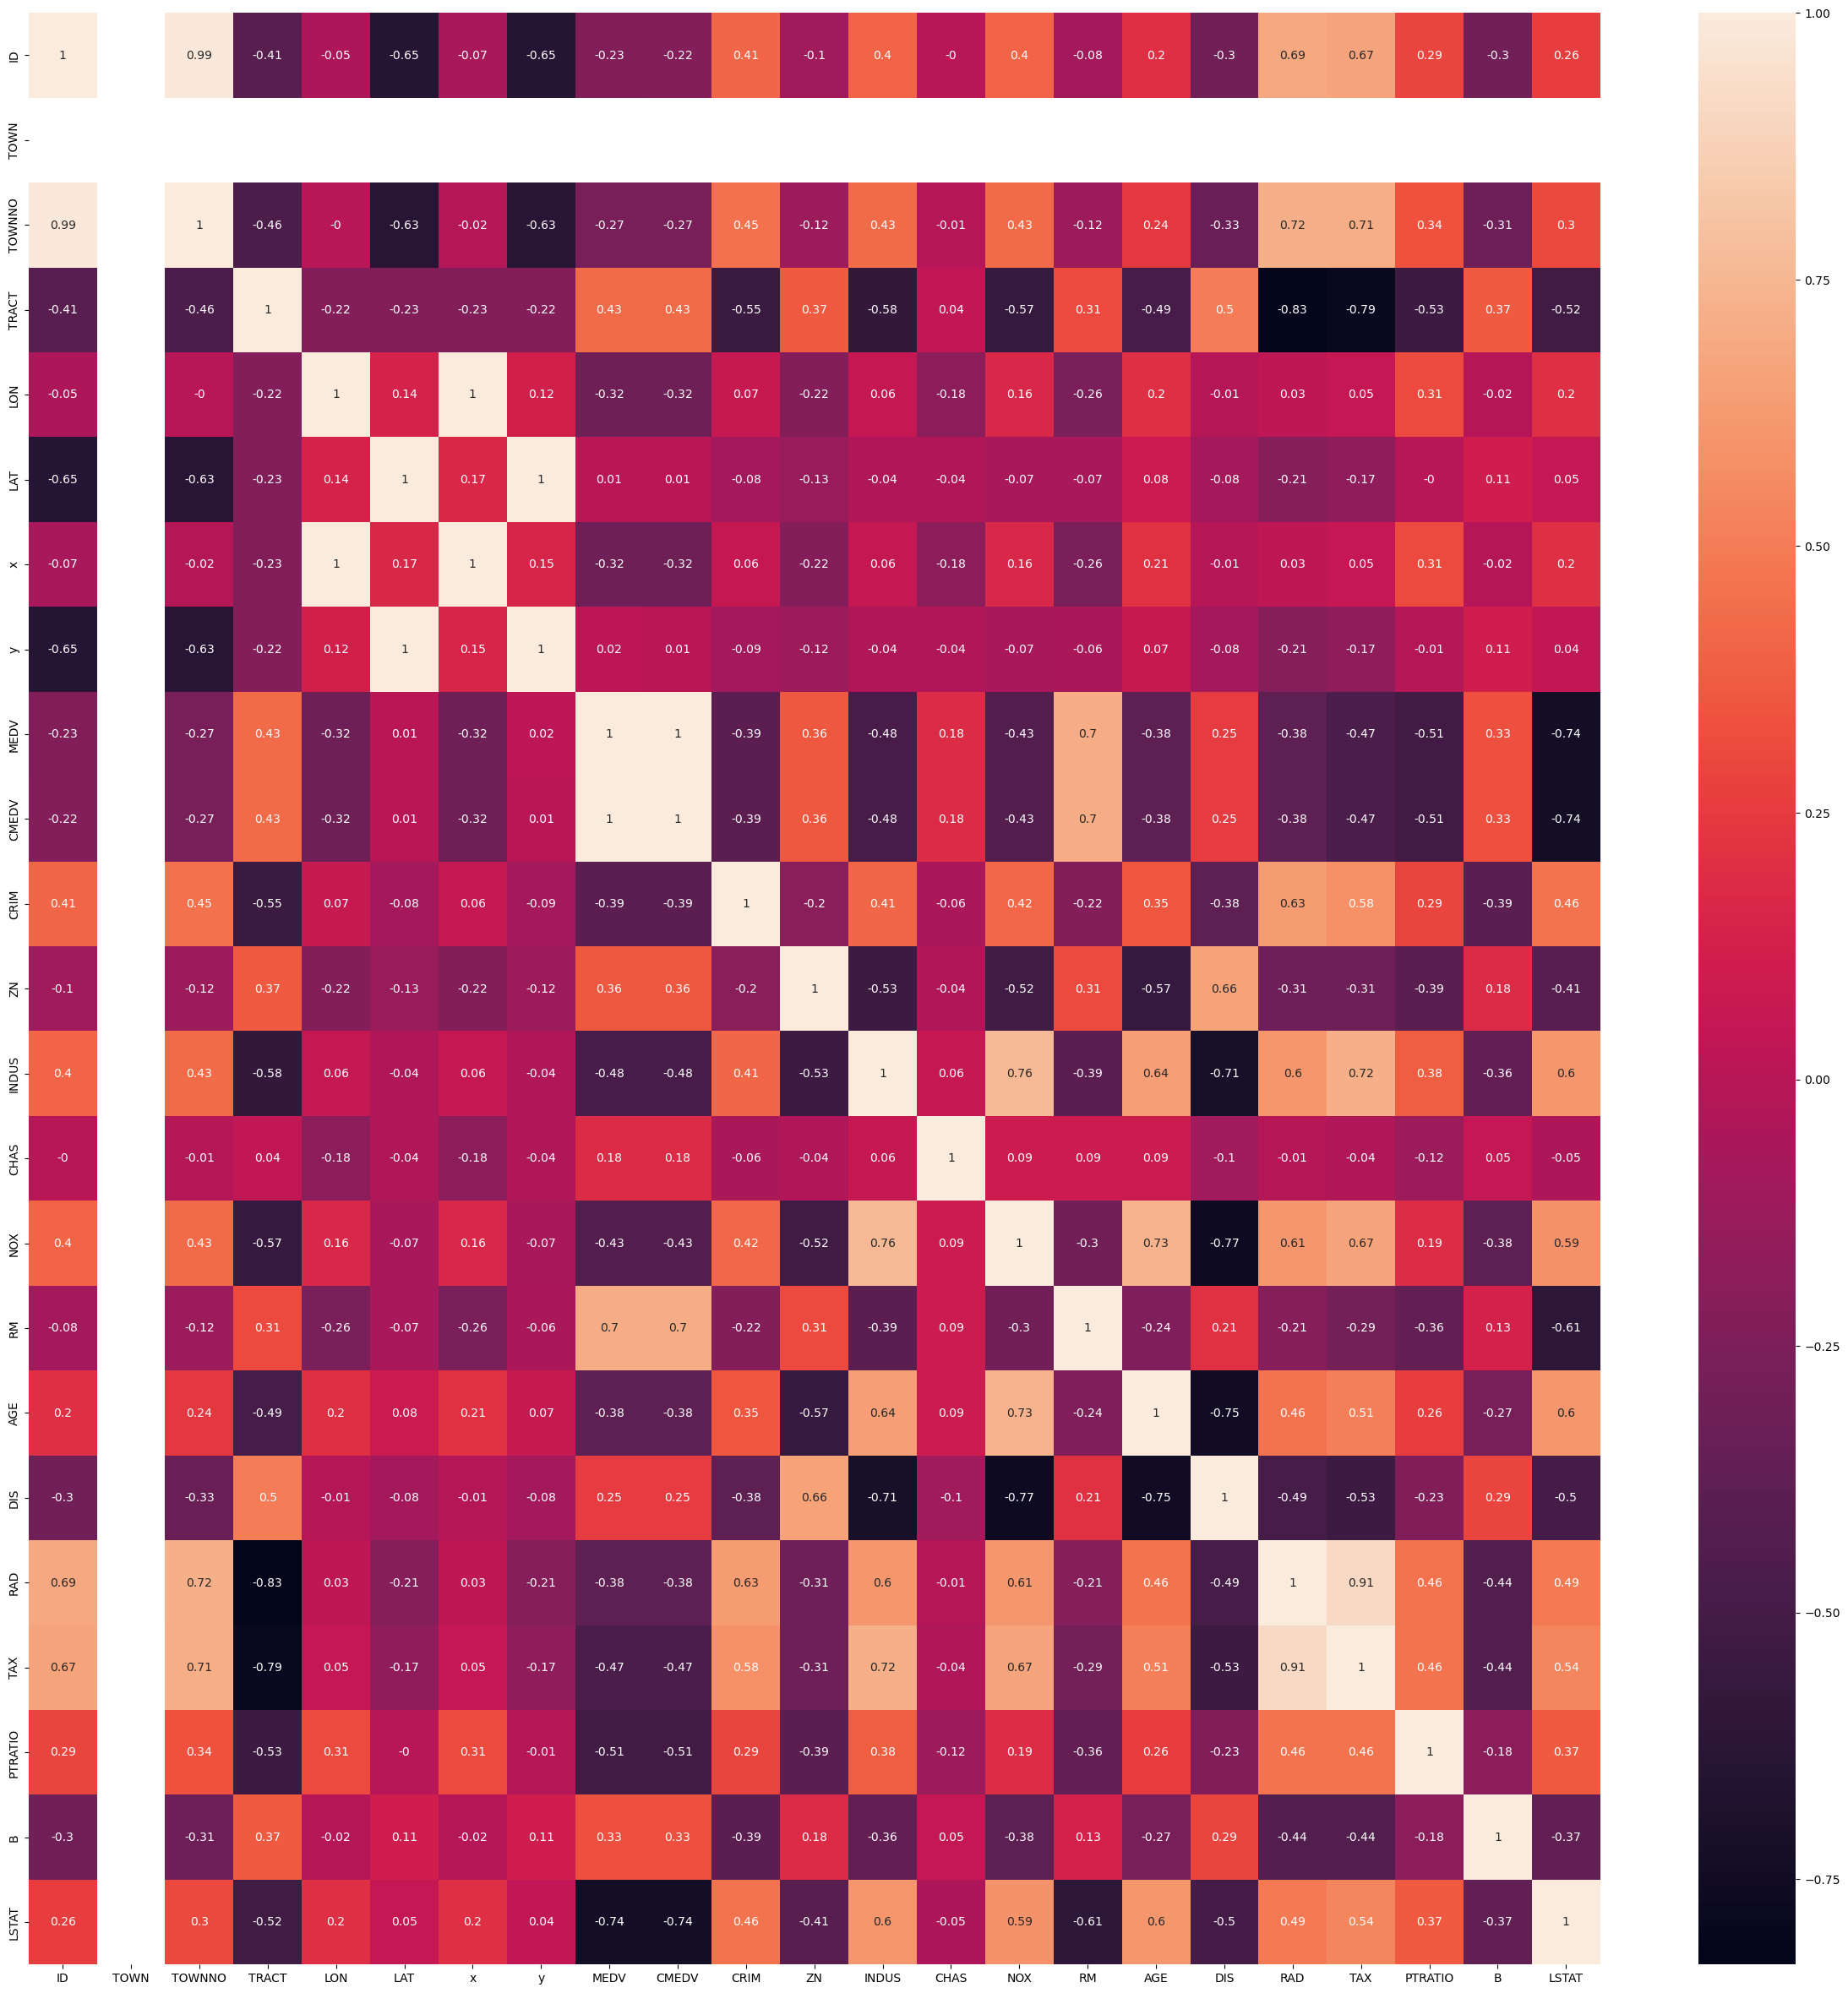

In [3]:
# 상관관계가 높되 뽑는 특징들끼리는 상관관계가 높으면 안된다.

plt.figure(figsize = (30, 30))

corr = boston.corr().round(2)

sns.heatmap(corr, annot = True)

plt.show()
# sns.PariGrid(boston, aspect = 1.4, diag_sharey = False)

In [3]:
boston_X = boston[['LSTAT', 'RM']]
boston_y = boston['MEDV']

In [40]:
# 3차원 그래프에서 점의 깊이를 알기 어려울 때 명령어
# 창으로
#%matplotlib qt5 
# 복구
%matplotlib inline 

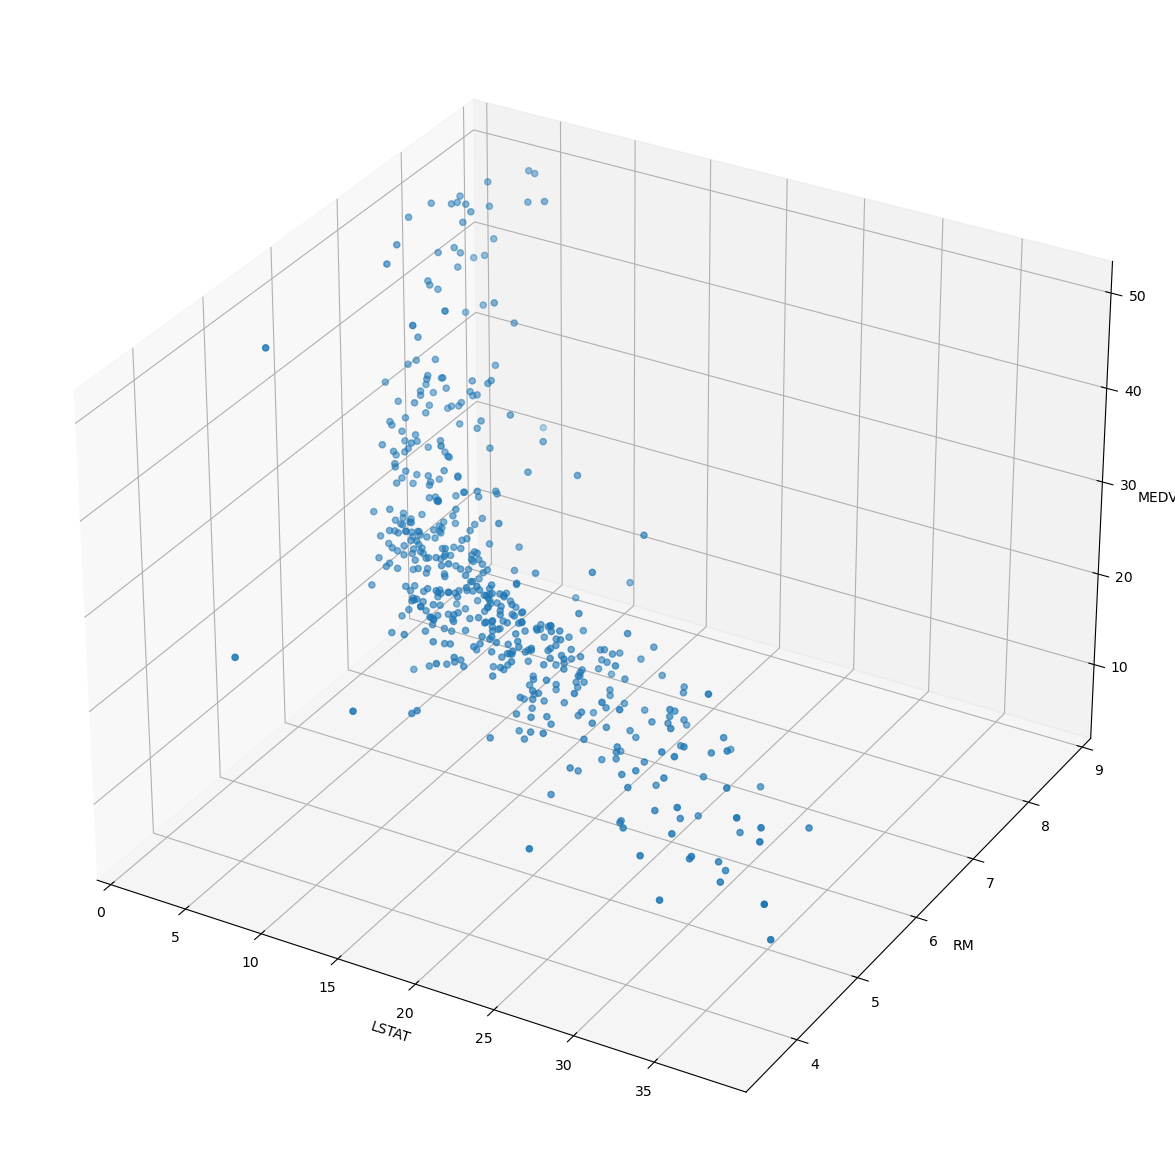

In [12]:
# 3차원 plot 추가

fig = plt.figure(figsize = (15, 15))

ax = fig.add_subplot(111, projection = '3d') # projection 뭘로 투영할지

ax.scatter(boston_X['LSTAT'], boston_X['RM'], boston_y)
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

In [4]:
# 다항선형회귀

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(boston_X)

lr = LinearRegression()
lr.fit(X_pf, boston_y)

LinearRegression()

In [5]:
xr = np.arange(0, 40, 1) # x, y 범위에 맞춰 데이터 생성
yr = np.arange(0, 10, 1)

xr, yr = np.meshgrid(xr, yr) # meshgrid xr과 yr의 shape가 같아짐


con_xr_yr = np.concatenate([xr.reshape(-1, 1), yr.reshape(-1, 1)], axis = 1) # xr과 yr을 shape 400,1로 바꾼 후 합친다

p = lr.predict(pf.transform(con_xr_yr)) # 예측값 

C:\Users\PC\anaconda3\envs\CW_AI_Academy\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [8]:
%matplotlib qt5

In [9]:
fig = plt.figure(figsize = (15, 15))

ax = fig.add_subplot(111, projection = '3d') # projection 뭘로 투영할지

ax.plot_surface(xr, yr, p.reshape(xr.shape), alpha = 0.3, color = 'None')

ax.scatter(boston_X['LSTAT'], boston_X['RM'], boston_y)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

# 데이터의 정규화

* 데이터 값의 범위가 크게 다른 특징들을 입력 변수로 사용하면 적절한 학습이 이뤄지지 않을 수도 있다.
* 데이터의 스케일을 맞춰준다.
* 정규화 
    - x(정규화) = (x - x(min)) / (x(max) - x(min)) 
    - 대표적인 정규화, 범위가 0 ~ 1 로 바뀐다.
    - normalize(a, axis = ?)
    - min, max Scaler
* 표준화 
    - x' = (x - 평균) / 표준편차 
    - 평균 0, 표준편차 1 인 데이터가 됨
    - sklrean preprocessing의 standardscaler 를 사용


* 값 차이가 크지않아도 기본적으로 해주는게 좋다.

* 정규화? 표준화?
    - 데이터의 분표를 보고 정규분포를 가지는가?
    - 데이터의 범위가 명확하지 않다. 
        - standard Scaler
        - ex. 키
    - 데이터의 범위가 명확하다.
        - min, max Scaler
        - ex. 이미지 (0~255)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size = 0.3, random_state = 1)

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_pf, y_train)

p_test = lr.predict (pf.transform(X_test))
print('기본 :', mean_squared_error(y_test, p_test))

# StandardScaler, 스케일링 

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train) # 교육 데이터 스케일링

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train_sc) # 교육 데이터 차원 조정

lr = LinearRegression()
lr.fit(X_pf, y_train) # 교육

X_test_sc = scaler.transform(X_test) # 예측 데이터 스케일링
p_test = lr.predict (pf.transform(X_test_sc)) # 예측 데이터 차원 조정, 예측
print('표준화:', mean_squared_error(y_test, p_test))

# MinMaxScaler, 스케일링 

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train) # 교육 데이터 스케일링

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train_sc) # 교육 데이터 차원 조정

lr = LinearRegression()
lr.fit(X_pf, y_train) # 교육

X_test_sc = scaler.transform(X_test) # 예측 데이터 스케일링
p_test = lr.predict (pf.transform(X_test_sc)) # 예측 데이터 차원 조정, 예측
print('정규화:', mean_squared_error(y_test, p_test))

기본 : 16.915406773905943
표준화: 16.915406773906
정규화: 16.915406773906003


# 머신러닝을 위한 기초지식

* 과적합을 피하기 위한 방법
* 데이터에서 x가 너무 많으면 과적합
* 모델의 항의 수를 줄여주기 위해서 쓰는 모델
* 머신러닝 정칙화(규제)0 파라미터들이 지나치게 큰 값을 갖지 못하게 만드는 것
    - 파라미터 수축
    - 라소 기법 least absolute shrinkage and selection operator 

* l1 노름 사용 L1 정칙화
    - 라소 기법
* l2 노름 사용 L2 정칙화 : 능형 회귀
    - 리지 기법 (ridge regression)


In [25]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
wine.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) # y에대해 동등하게 나눠준다.

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train) # 분류 문제에서 y는 scale 해주면 안된다.
X_test_sc =scaler.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 1, random_state = 0, penalty = 'l1') # penalty l1 : 라쏘 기법, C : 규제 강도

lr.fit(X_train_sc, y_train)

lr.score(X_test_sc, y_test) # 예측값으로 확인하는 대신 알아서

1.0

In [51]:
weights = []
params = []
score = []

for c in range(-4, 6) : # -4 ~ 5까지
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 10**c, random_state = 0, penalty = 'l1')
    lr.fit(X_train_sc, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    score.append(lr.score(X_test_sc, y_test))

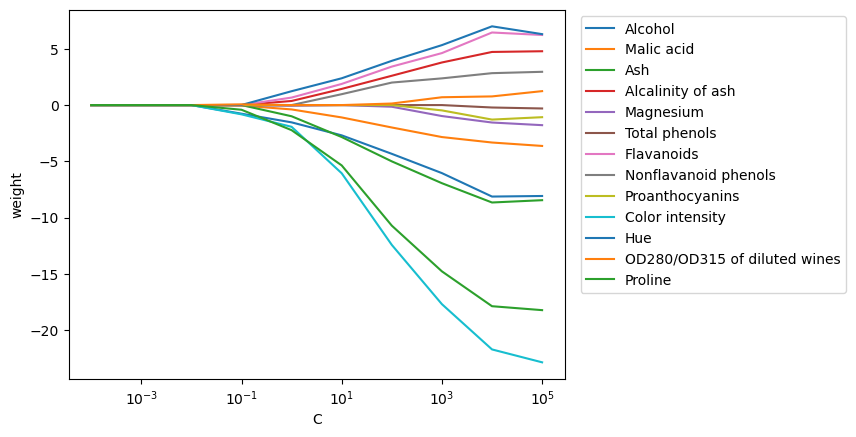

In [58]:
weights = np.array(weights)

fig = plt.figure()

ax = fig.add_subplot(111)

for column in range(len(wine.columns[1:])) :
    plt.plot(params, weights[:, column], label = wine.columns[column + 1])


plt.xlabel('C')
plt.ylabel('weight')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1.3, 1.0), ncol = 1, fancybox = True)
plt.show()


# 규제가 높을수록 (C의 값이 작을수록) 각 특징의 Class 구분에대한 중요도? 비중? 이 0으로 수렴한다. 규제가 약할때는  

In [34]:
lr.coef_ # 현재 가중치 확인  각각 class 1, 2, 3에대한 가중치 13개

# 0인 것은 가중치 없어도 된다고 판단되어서 

array([[ 1.24572998,  0.18063968,  0.74370406, -1.16146556,  0.        ,
         0.        ,  1.16997213,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54750453,  2.51033461],
       [-1.53722377, -0.38703221, -0.99513708,  0.36493139, -0.05955851,
         0.        ,  0.66795612,  0.        ,  0.        , -1.93393651,
         1.23386892,  0.        , -2.23181947],
       [ 0.13516421,  0.16971314,  0.35775331,  0.        ,  0.        ,
         0.        , -2.43352601,  0.        ,  0.        ,  1.56184137,
        -0.81858551, -0.49633263,  0.        ]])

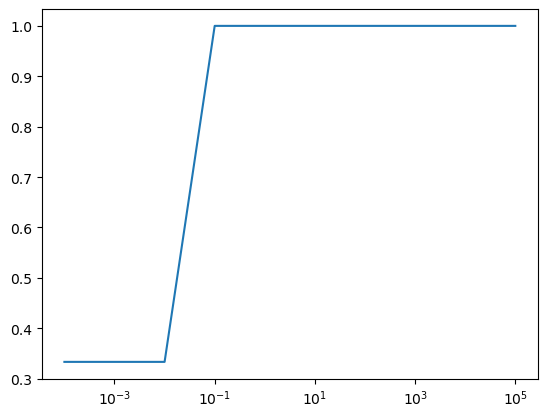

In [57]:
plt.figure()
plt.plot(params, score)
plt.xscale('log')
plt.show()

# 규제가 강한 10**-3 구간은 분류하지 못하고 점수가 낮게 나온다.
# score가 1이 나온다. = 모델을 잘 만들었거나 데이터가 너무 적다.

In [59]:
weights = []
params = []
score = []

for c in range(-4, 6) : # -4 ~ 5까지
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 10**c, random_state = 0, penalty = 'l2') # penalty l2 : ridge
    lr.fit(X_train_sc, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    score.append(lr.score(X_test_sc, y_test))

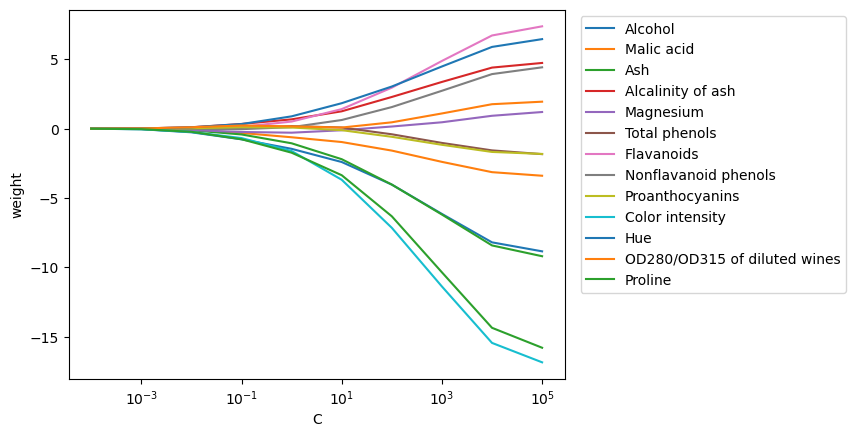

In [60]:
weights = np.array(weights)

fig = plt.figure()

ax = fig.add_subplot(111)

for column in range(len(wine.columns[1:])) :
    plt.plot(params, weights[:, column], label = wine.columns[column + 1])


plt.xlabel('C')
plt.ylabel('weight')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1.3, 1.0), ncol = 1, fancybox = True)
plt.show()


# 규제가 높을수록 (C의 값이 작을수록) 각 특징의 Class 구분에대한 중요도? 비중? 이 0으로 수렴한다. 규제가 약할때는  

In [34]:
lr.coef_ # 현재 가중치 확인  각각 class 1, 2, 3에대한 가중치 13개

# 0인 것은 가중치 없어도 된다고 판단되어서 

array([[ 1.24572998,  0.18063968,  0.74370406, -1.16146556,  0.        ,
         0.        ,  1.16997213,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54750453,  2.51033461],
       [-1.53722377, -0.38703221, -0.99513708,  0.36493139, -0.05955851,
         0.        ,  0.66795612,  0.        ,  0.        , -1.93393651,
         1.23386892,  0.        , -2.23181947],
       [ 0.13516421,  0.16971314,  0.35775331,  0.        ,  0.        ,
         0.        , -2.43352601,  0.        ,  0.        ,  1.56184137,
        -0.81858551, -0.49633263,  0.        ]])

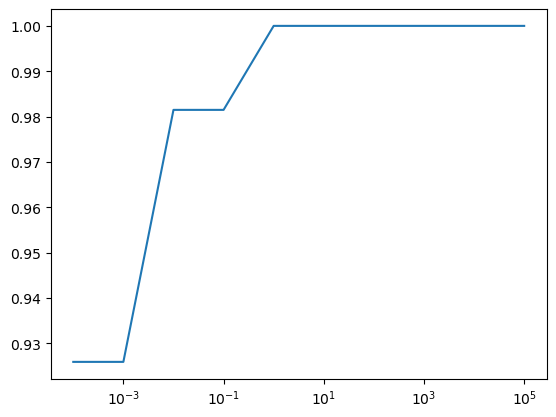

In [61]:
plt.figure()
plt.plot(params, score)
plt.xscale('log')
plt.show()

# ridge가 l1보다 score 최저점이 높다.
# 특성 판별하기에는 l1이 좋고 모델을 안정적으로 만들기 위해서는 l2가 좋다.
# sklearn Lasso, Ridge가 구현되어있다.